### Load All Stations from Douglas Island to take a look, and do preliminary data cleaning

Notebook contents 
* load one WY at a time
* take a look at all variables

created by Cassie Lumbrazo\
last updated: March 2025\
run location: UAS linux\
python environment: **xarray**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker
from matplotlib.patches import Rectangle

In [3]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

# WY2025 Prelim Analysis
### Read in WY2025 data, so far, and compare snow depth with our observations

In [4]:
# filename = '/home/cassie/data/fishcreek/mesonet/rawdata/DouglasIsland_AllStations_RawData_WY2024.txt'
filename = '/home/cassie/data/fishcreek/mesonet/rawdata/DouglasIsland_AllStations_RawData_WY2025_until16March2025.txt'

# open
df = pd.read_csv(filename, sep = ",")

# make utc_valid a datetime and index the df by it 
df['datetime'] = pd.to_datetime(df['utc_valid'])
df = df.set_index('datetime')
df.head()

,station,utc_valid,HGIRZZZ,PAIRZZZ,PCIRZZZ,PPDRZZZ,PPIRZZZ,PPPRZZZ,PPVRZZZ,PTIRZZZ,...,VVIRZZZ,VVPRZZZ,XCIRZZZ,XCPRZZZ,XPPRZZZ,XPQRZZZ,XRIRZZZ,XWIRZZZ,XWPRZZZ,sdIRZZZ
datetime,,,,,,,,,,,,,,,,,,,,,
2024-10-01 00:04:00,ECEA2,2024-10-01 00:04:00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:09:00,ECEA2,2024-10-01 00:09:00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:14:00,ECEA2,2024-10-01 00:14:00,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:19:00,ECEA2,2024-10-01 00:19:00,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
2024-10-01 00:24:00,ECEA2,2024-10-01 00:24:00,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN


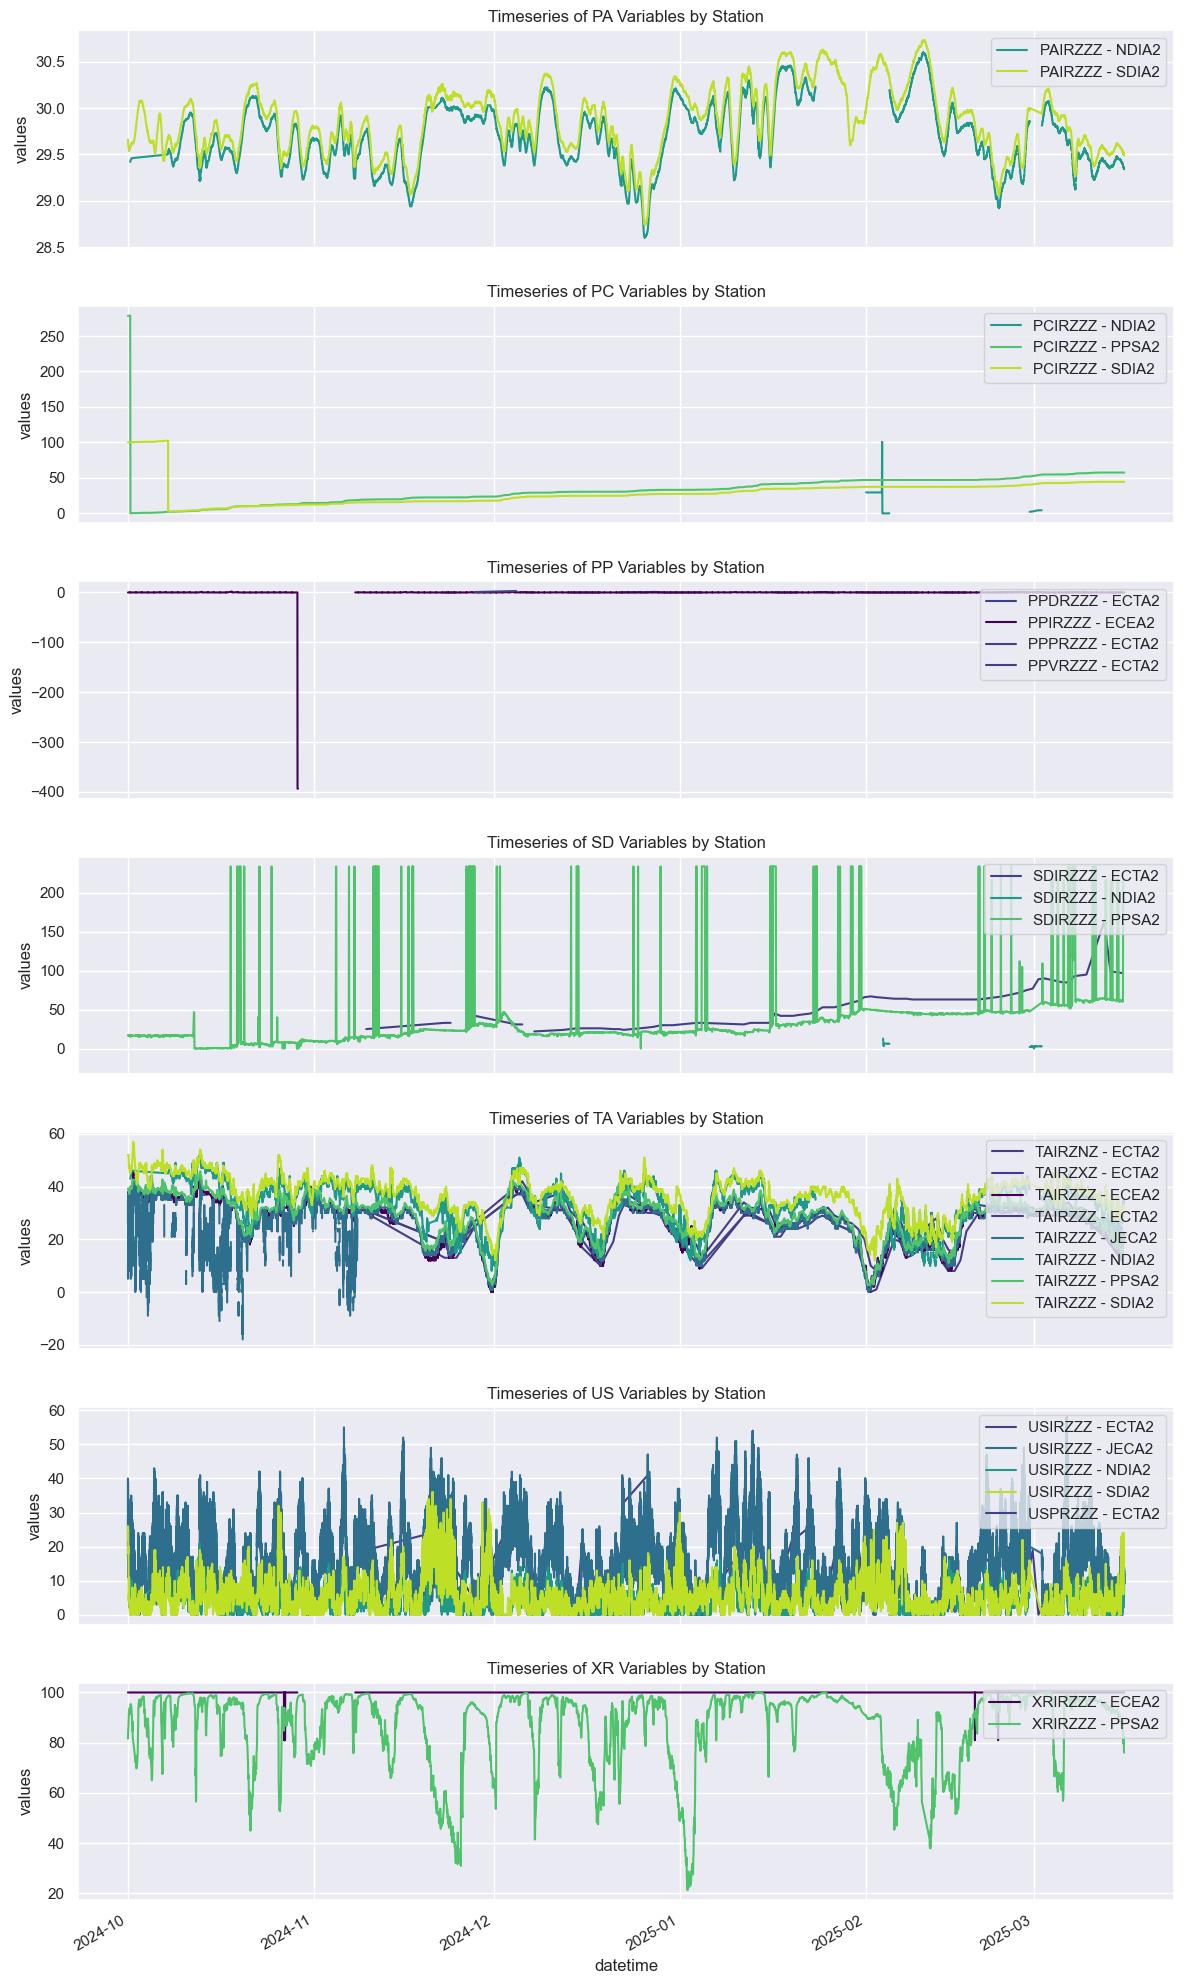

In [5]:
unique_stations = df['station'].unique()

# Create a color map for the unique stations
colors = plt.cm.viridis(np.linspace(0, 0.9, len(unique_stations)))
station_color_map = {station: color for station, color in zip(unique_stations, colors)}

# Create a figure with 14 subplots
fig, ax = plt.subplots(7, 1, figsize=(12, 20), sharex=True)

# Define the variable groups based on their prefixes
variable_groups = {
    'PA': ['PAIRZZZ'], # air pressure
    'PC': ['PCIRZZZ'],
    'PP': ['PPDRZZZ', 'PPIRZZZ', 'PPPRZZZ', 'PPVRZZZ'], # precipitation (includes liquid amount of new snowfall)
    # 'PT': ['PTIRZZZ', 'PTPRZZZ'], # precipitation type (0 = none, 1 = rain, 2 = snow, 3 = freezing rain, 4 = ice pellets)
    'SD': ['SDIRZZZ'],
    # 'SF': ['SFDRZZZ', 'SFPRZZZ', 'SFVRZZZ'],
    'TA': ['TAIRZNZ', 'TAIRZXZ', 'TAIRZZZ'],
    # 'TD': ['TDIRZZZ'],
    # 'UD': ['UDIRZZZ', 'UDPRZZZ'],
    # 'UG': ['UGIRZZZ', 'UGPRZZZ'],
    # 'UP': ['UPIRZZZ', 'UPPRZZZ'],
    # 'UR': ['URIRZZZ', 'URPRZZZ'],
    'US': ['USIRZZZ', 'USPRZZZ'],
    # 'V': ['VVIRZZZ', 'VVPRZZZ'], # voltage, not needed to plot anymore
    # 'XC': ['XCIRZZZ', 'XCPRZZZ'],
    # 'XP': ['XPPRZZZ', 'XPQRZZZ'],
    'XR': ['XRIRZZZ'],
    # 'XW': ['XWIRZZZ', 'XWPRZZZ']
}

# Loop through each group and plot the variables
for i, (prefix, variables) in enumerate(variable_groups.items()):
    for var in variables:
        for station in unique_stations:
            # Filter the DataFrame for the current station
            station_data = df[df['station'] == station]
            # Check if the variable exists in the station's data
            if var in station_data.columns and not station_data[var].isnull().all():
                # Plot the variable for the current station with the assigned color
                station_data[var].plot(ax=ax[i], label=f'{var} - {station}', color=station_color_map[station])
    
    # Set titles and labels for each subplot
    ax[i].set_title(f'Timeseries of {prefix} Variables by Station')
    ax[i].set_ylabel('values')
    ax[i].legend(loc='upper right')

# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')

# just limit the yaxis of a few of the graphs for viewing
# ax[1].set_ylim(-10, 400)
# ax[2].set_ylim(-0.1, 2)
# ax[3].set_ylim(-10, 200)

plt.tight_layout()
plt.show()

In [6]:
# light cleaning based on the first plot, just for the figure cleaning.. 
# drop PCIRZZZ values above 100 
df['PCIRZZZ'] = df['PCIRZZZ'].where(df['PCIRZZZ'] < 100) # only keep values less than 100

df['PPDRZZZ'] = df['PPDRZZZ'].where(df['PPDRZZZ'] > -100)
df['PPIRZZZ'] = df['PPIRZZZ'].where(df['PPIRZZZ'] > -100)
df['PPPRZZZ'] = df['PPPRZZZ'].where(df['PPPRZZZ'] > -100)
df['PPVRZZZ'] = df['PPVRZZZ'].where(df['PPVRZZZ'] > -100)


# drop any SDIRZZZ values above 100, for now 
df['SDIRZZZ'] = df['SDIRZZZ'].where(df['SDIRZZZ'] < 100)

In [7]:
# determine how many stations there are with the variable df['SDIRZZZ'] 
# df['SDIRZZZ'].station.unique()

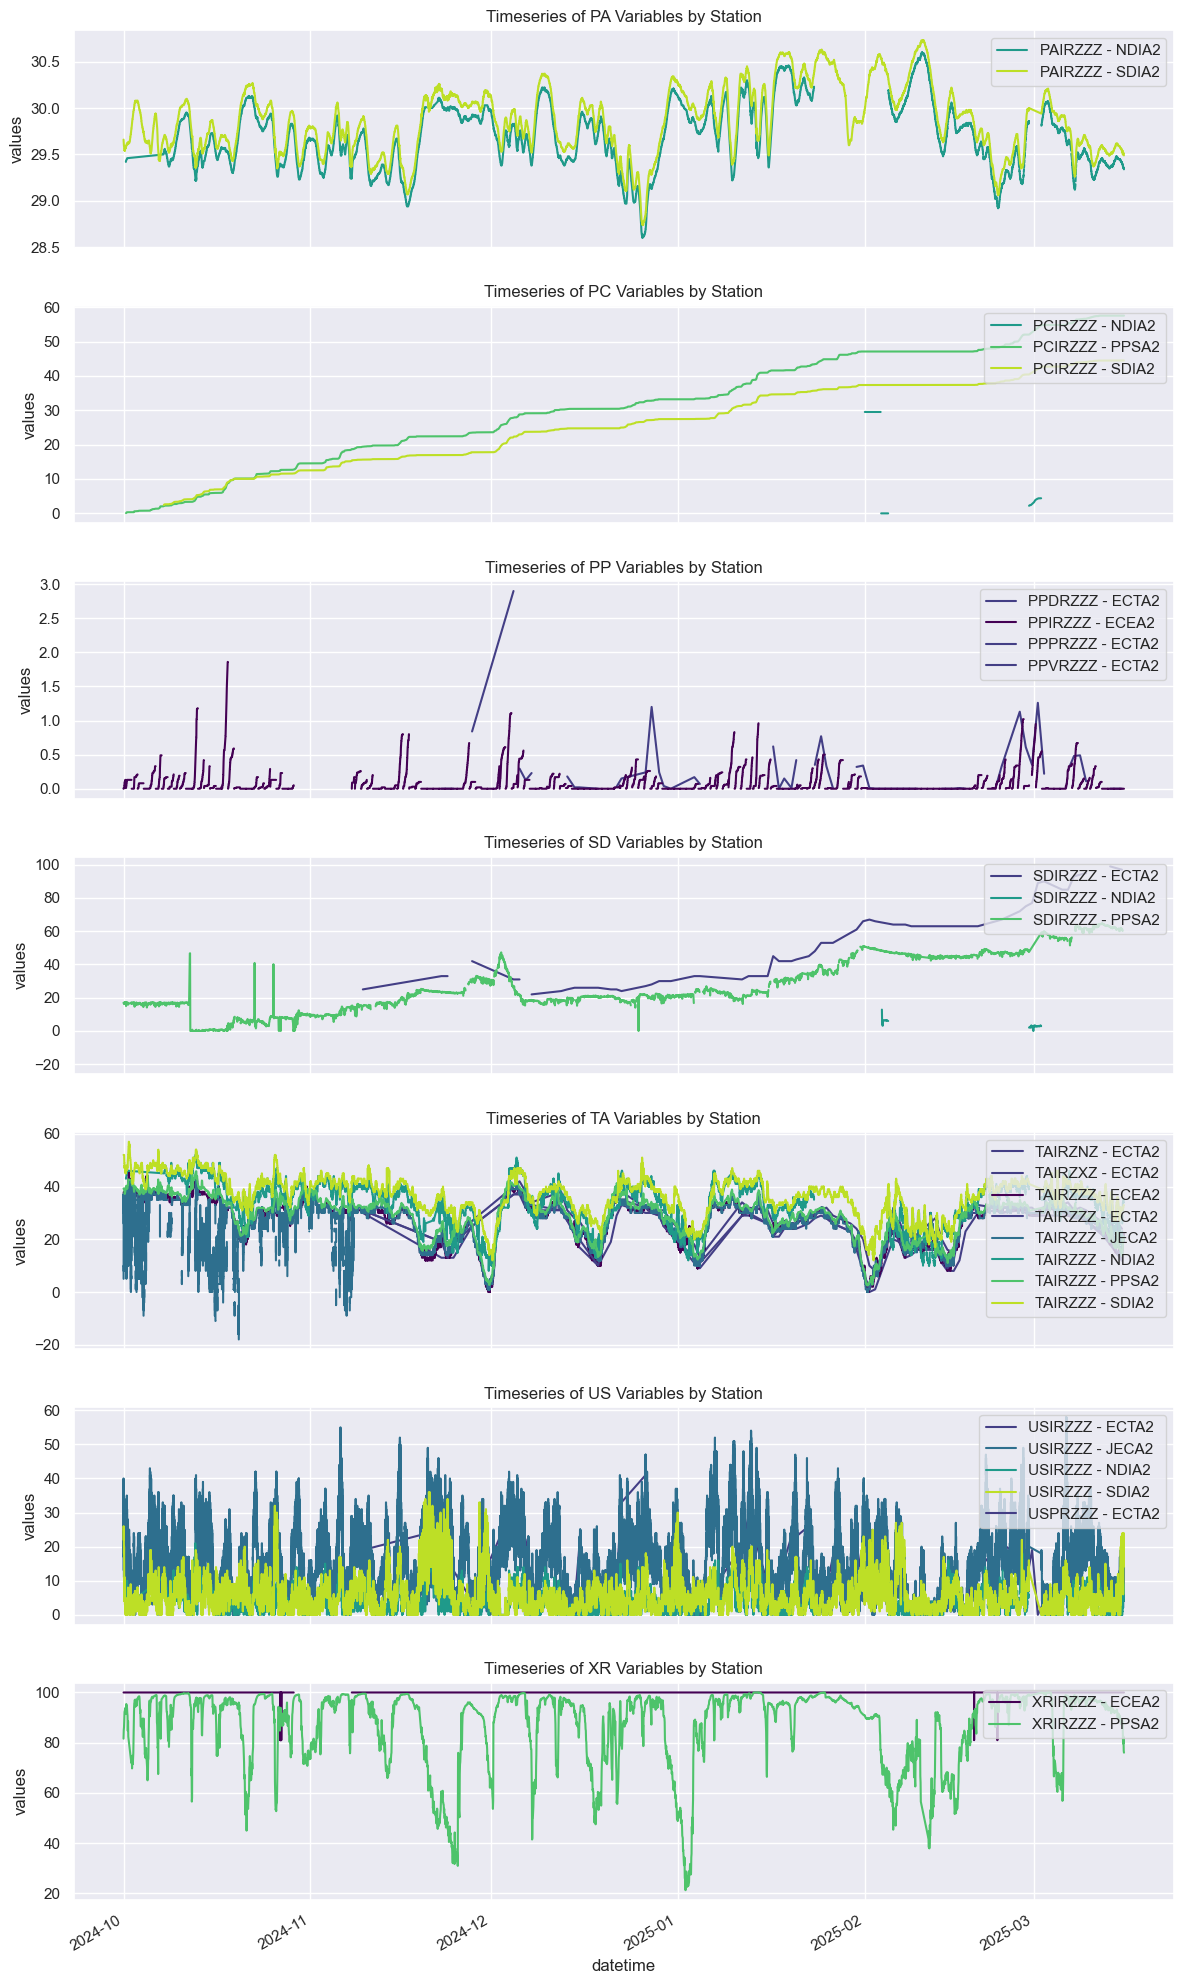

In [8]:
unique_stations = df['station'].unique()

# Create a color map for the unique stations
colors = plt.cm.viridis(np.linspace(0, 0.9, len(unique_stations)))
station_color_map = {station: color for station, color in zip(unique_stations, colors)}

# Create a figure with 14 subplots
fig, ax = plt.subplots(7, 1, figsize=(12, 20), sharex=True)

# Define the variable groups based on their prefixes
variable_groups = {
    'PA': ['PAIRZZZ'], # air pressure
    'PC': ['PCIRZZZ'],
    'PP': ['PPDRZZZ', 'PPIRZZZ', 'PPPRZZZ', 'PPVRZZZ'], # precipitation (includes liquid amount of new snowfall)
    # 'PT': ['PTIRZZZ', 'PTPRZZZ'], # precipitation type (0 = none, 1 = rain, 2 = snow, 3 = freezing rain, 4 = ice pellets)
    'SD': ['SDIRZZZ'],
    # 'SF': ['SFDRZZZ', 'SFPRZZZ', 'SFVRZZZ'],
    'TA': ['TAIRZNZ', 'TAIRZXZ', 'TAIRZZZ'],
    # 'TD': ['TDIRZZZ'],
    # 'UD': ['UDIRZZZ', 'UDPRZZZ'],
    # 'UG': ['UGIRZZZ', 'UGPRZZZ'],
    # 'UP': ['UPIRZZZ', 'UPPRZZZ'],
    # 'UR': ['URIRZZZ', 'URPRZZZ'],
    'US': ['USIRZZZ', 'USPRZZZ'],
    # 'V': ['VVIRZZZ', 'VVPRZZZ'], # voltage, not needed to plot anymore
    # 'XC': ['XCIRZZZ', 'XCPRZZZ'],
    # 'XP': ['XPPRZZZ', 'XPQRZZZ'],
    'XR': ['XRIRZZZ'],
    # 'XW': ['XWIRZZZ', 'XWPRZZZ']
}

# Loop through each group and plot the variables
for i, (prefix, variables) in enumerate(variable_groups.items()):
    for var in variables:
        for station in unique_stations:
            # Filter the DataFrame for the current station
            station_data = df[df['station'] == station]
            # Check if the variable exists in the station's data
            if var in station_data.columns and not station_data[var].isnull().all():
                # Plot the variable for the current station with the assigned color
                station_data[var].plot(ax=ax[i], label=f'{var} - {station}', color=station_color_map[station])
    
    # Set titles and labels for each subplot
    ax[i].set_title(f'Timeseries of {prefix} Variables by Station')
    ax[i].set_ylabel('values')
    ax[i].legend(loc='upper right')

# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')

# just limit the yaxis of a few of the graphs for viewing
# ax[1].set_ylim(-10, 400)
# ax[2].set_ylim(-0.1, 2)
# ax[3].set_ylim(-10, 200)

plt.tight_layout()
plt.show()

Now, just plot snow depth to see how the measurements this season look like, 

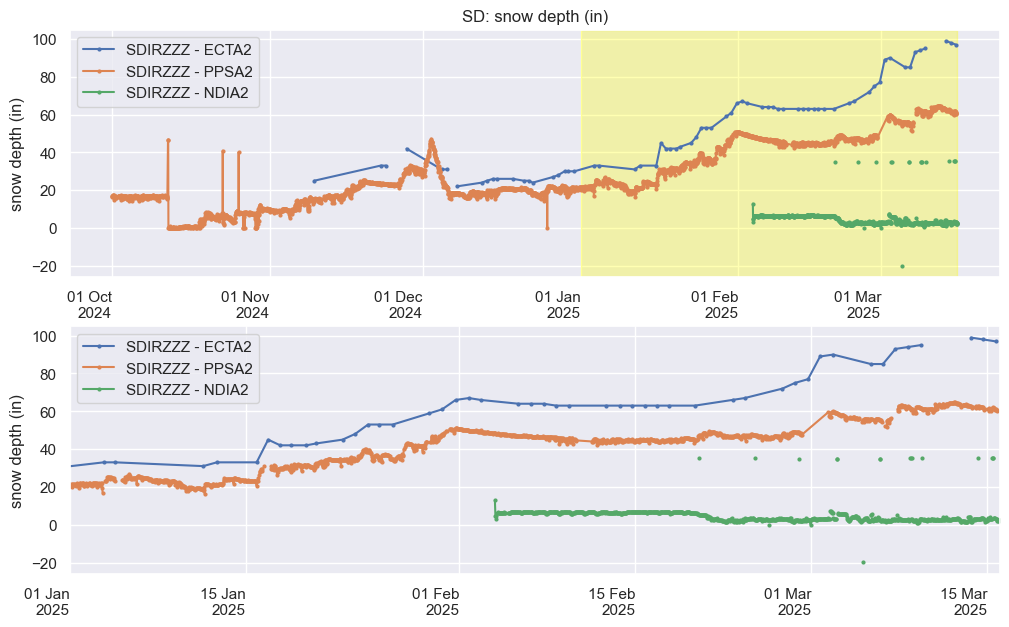

In [9]:
# plot snow depth from WY2025 data, so far 
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=True)
df['SDIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[0], marker='o', markersize=2, label='SDIRZZZ - ECTA2')
df['SDIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[0], marker='o', markersize=2, label='SDIRZZZ - PPSA2')
df['SDIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[0], marker='o', markersize=2, label='SDIRZZZ - NDIA2')

df['SDIRZZZ'].where(df['station'] == 'ECTA2').plot(ax=ax[1], marker='o', markersize=2, label='SDIRZZZ - ECTA2')
df['SDIRZZZ'].where(df['station'] == 'PPSA2').plot(ax=ax[1], marker='o', markersize=2, label='SDIRZZZ - PPSA2')
df['SDIRZZZ'].where(df['station'] == 'NDIA2').plot(ax=ax[1], marker='o', markersize=2, label='SDIRZZZ - NDIA2')

# set titles and labels 
ax[0].set_title('SD: snow depth (in)')
ax[0].set_ylabel('snow depth (in)')
ax[1].set_ylabel('snow depth (in)')

# zoom in the bottom plot
start_date = '2025-01-01'
end_date = '2025-03-16'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.3))

plt.show()


And, let's convert to cm and then add points for our observations..

In [10]:
# create a dataframe with individual observations of snow depth to then plot with the timeseries 
obs = {
    'datetime': ['2025-01-23', '2025-01-28', '2025-02-12', '2025-02-16', '2025-02-20', '2025-02-27', '2025-03-13'],
    'snowdepth': [126, 123, 133, 130, 128, 147, 177]
}

df_obs = pd.DataFrame(obs)
df_obs['datetime'] = pd.to_datetime(df_obs['datetime'])
df_obs.set_index('datetime', inplace=True)
# but keep datetime as a column too 
df_obs['datetime'] = df_obs.index
df_obs

,snowdepth,datetime
datetime,,
2025-01-23,126,2025-01-23
2025-01-28,123,2025-01-28
2025-02-12,133,2025-02-12
2025-02-16,130,2025-02-16
2025-02-20,128,2025-02-20
2025-02-27,147,2025-02-27
2025-03-13,177,2025-03-13


In [11]:
# df_obs['snowdepth'].plot(marker='o')

# plot without the connecting line between markers 
# plt.scatter(df_obs['datetime'], df_obs['snowdepth'])

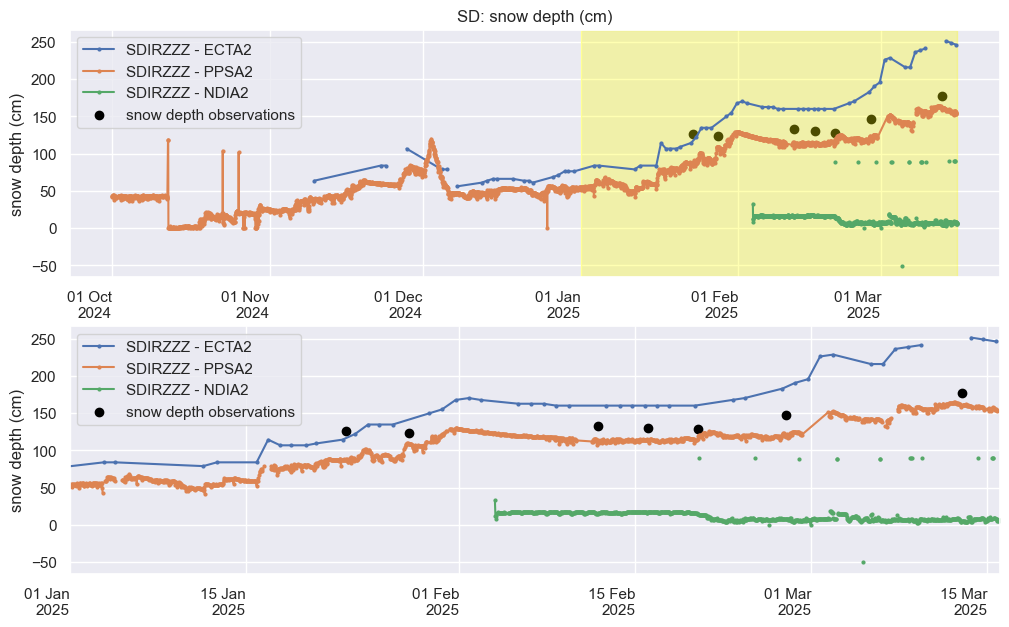

In [12]:
# plot snow depth from WY2025 data, so far 
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=False, sharey=True)
(df['SDIRZZZ'].where(df['station'] == 'ECTA2')*2.54).plot(ax=ax[0], marker='o', markersize=2, label='SDIRZZZ - ECTA2')
(df['SDIRZZZ'].where(df['station'] == 'PPSA2')*2.54).plot(ax=ax[0], marker='o', markersize=2, label='SDIRZZZ - PPSA2')
(df['SDIRZZZ'].where(df['station'] == 'NDIA2')*2.54).plot(ax=ax[0], marker='o', markersize=2, label='SDIRZZZ - NDIA2')
ax[0].scatter(df_obs.index, df_obs['snowdepth'], label='snow depth observations', color='black', marker='o')

(df['SDIRZZZ'].where(df['station'] == 'ECTA2')*2.54).plot(ax=ax[1], marker='o', markersize=2, label='SDIRZZZ - ECTA2')
(df['SDIRZZZ'].where(df['station'] == 'PPSA2')*2.54).plot(ax=ax[1], marker='o', markersize=2, label='SDIRZZZ - PPSA2')
(df['SDIRZZZ'].where(df['station'] == 'NDIA2')*2.54).plot(ax=ax[1], marker='o', markersize=2, label='SDIRZZZ - NDIA2')
ax[1].scatter(df_obs.index, df_obs['snowdepth'], label='snow depth observations', color='black', marker='o')

# set titles and labels 
ax[0].set_title('SD: snow depth (cm)')
ax[0].set_ylabel('snow depth (cm)')
ax[1].set_ylabel('snow depth (cm)')

# zoom in the bottom plot
start_date = '2025-01-01'
end_date = '2025-03-16'
ax[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

# --------------------------------------------------------------------------------------------
# set non-changing labels
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

# change the layout of the datetime xlabels
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=360)
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=360)

# Create the hightlighted region on subplot 1 ------------------------------------------------
# create a highlighted box on the region of the first subplot which is plotted in the second
highlight_start = pd.to_datetime(start_date)
highlight_end = pd.to_datetime(end_date)

# convert Timestamps to matplotlib date format
highlight_start_num = dates.date2num(highlight_start)
highlight_end_num = dates.date2num(highlight_end)

# add the rectangle to the first subplot
ax[0].add_patch(Rectangle((highlight_start_num, ax[0].get_ylim()[0]), 
                           highlight_end_num - highlight_start_num,  # Width in days
                           ax[0].get_ylim()[1] - ax[0].get_ylim()[0], 
                           color='yellow', alpha=0.3))

plt.show()


Now, let's only plot Powder Patch Data for WY2025 so far 

In [13]:
# lets only plot PPSA2 station data all together 
# create a new dataframe with only PPSA2 station data
df_PPSA2 = df[df['station'] == 'PPSA2']
# drop the columns where all the values are NaN
df_PPSA2 = df_PPSA2.dropna(axis=1, how='all')
df_PPSA2.head()

,station,utc_valid,PCIRZZZ,SDIRZZZ,TAIRZZZ,XRIRZZZ
datetime,,,,,,
2024-10-01 00:00:00,PPSA2,2024-10-01 00:00:00,NaN,16.97,39.2,81.6
2024-10-01 01:00:00,PPSA2,2024-10-01 01:00:00,NaN,16.58,39.3,85.1
2024-10-01 02:00:00,PPSA2,2024-10-01 02:00:00,NaN,16.88,39.3,86.2
2024-10-01 03:00:00,PPSA2,2024-10-01 03:00:00,NaN,16.18,38.3,90.0
2024-10-01 04:00:00,PPSA2,2024-10-01 04:00:00,NaN,17.19,37.5,92.3


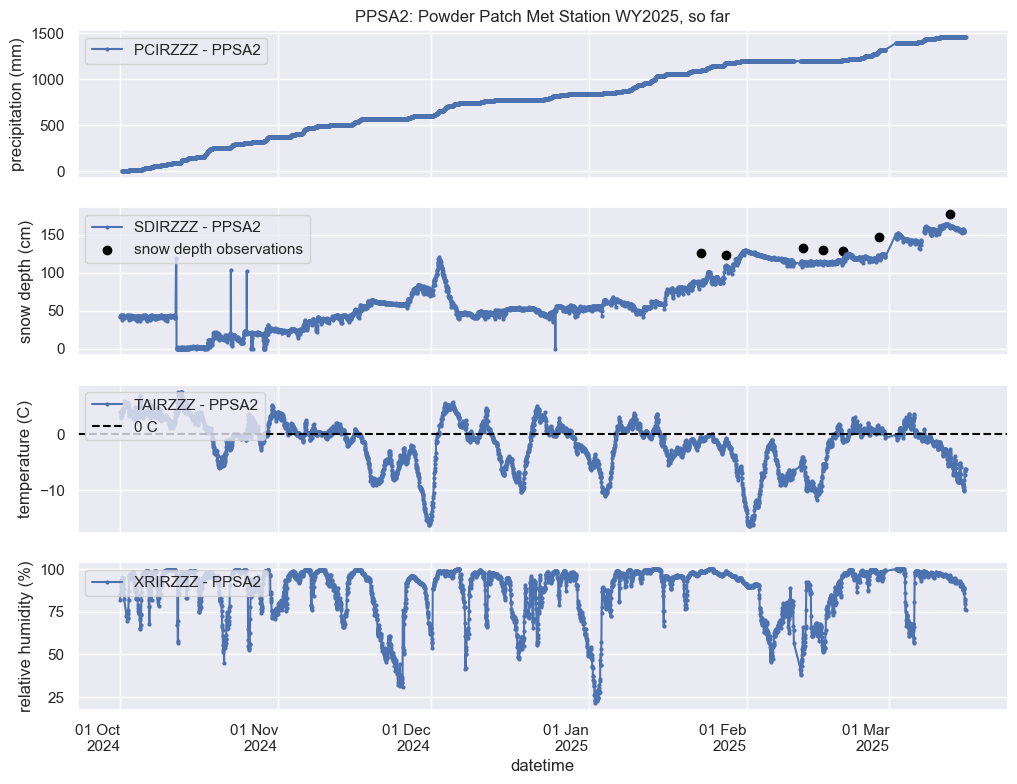

In [14]:
# now lets plot all the df_PPSA2 data, with each variable in subplots 
# Create a figure with subplots for each variable
# fig, ax = plt.subplots(len(df_PPSA2.columns), 1, figsize=(12, 20), sharex=True)
fig, ax = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

ax[0].set_title('PPSA2: Powder Patch Met Station WY2025, so far')

# df_PPSA2['PCIRZZZ'].plot(ax=ax[0],marker='o', markersize=2, label='PCIRZZZ - PPSA2') # inches 
# df_PPSA2['SDIRZZZ'].plot(ax=ax[1],marker='o', markersize=2, label='SDIRZZZ - PPSA2') # in inches 
# df_PPSA2['TAIRZZZ'].plot(ax=ax[2],marker='o', markersize=2, label='TAIRZZZ - PPSA2') # in F 

(df_PPSA2['PCIRZZZ']*25.4).plot(ax=ax[0],marker='o', markersize=2, label='PCIRZZZ - PPSA2') # mm
(df_PPSA2['SDIRZZZ']*2.54).plot(ax=ax[1],marker='o', markersize=2, label='SDIRZZZ - PPSA2') # in inches 
ax[1].scatter(df_obs.index, df_obs['snowdepth'], label='snow depth observations', color='black', marker='o') # add in the observations

((df_PPSA2['TAIRZZZ'] - 32)*5.0/9.0).plot(ax=ax[2],marker='o', markersize=2, label='TAIRZZZ - PPSA2') # now in C
# add a zero line on air temperature 
ax[2].axhline(y=0, color='black', linestyle='--', label='0 C')

df_PPSA2['XRIRZZZ'].plot(ax=ax[3],marker='o', markersize=2, label='XRIRZZZ - PPSA2')

# ax[0].set_ylabel('precipitation (in)')
# ax[2].set_ylabel('temperature (F)')
# ax[1].set_ylabel('snow depth (in)')

ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('snow depth (cm)')
ax[2].set_ylabel('temperature (C)')
ax[3].set_ylabel('relative humidity (%)')
        
# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')
# Set x-axis major formatter
ax[-1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[-1].xaxis.get_majorticklabels(), rotation=360)

# show a legend on all subplots
loc = 'upper left'
ax[0].legend(loc=loc)
ax[1].legend(loc=loc)
ax[2].legend(loc=loc)
ax[3].legend(loc=loc)

plt.show()

In [15]:
# find the first value of df_PPSA2['PCIRZZZ']
first_real_value = df_PPSA2['PCIRZZZ'].first_valid_index()
print(f"First real value in PCIRZZZ: {first_real_value}")

# print the value itself
first_real_value_value = df_PPSA2['PCIRZZZ'].loc[first_real_value]
print(f"Value at first real value in PCIRZZZ: {first_real_value_value}")

First real value in PCIRZZZ: 2024-10-01 10:00:00
Value at first real value in PCIRZZZ: 0.07


In [16]:
df_PPSA2['PPIRZZZ'] = df_PPSA2['PCIRZZZ'].diff() # subtract the previus value to get the difference 

# then drop any values about 10 
df_PPSA2['PPIRZZZ'] = df_PPSA2['PPIRZZZ'].where(df_PPSA2['PPIRZZZ'] < 1)
df_PPSA2

,station,utc_valid,PCIRZZZ,SDIRZZZ,TAIRZZZ,XRIRZZZ,PPIRZZZ
datetime,,,,,,,
2024-10-01 00:00:00,PPSA2,2024-10-01 00:00:00,NaN,16.97,39.2,81.60,NaN
2024-10-01 01:00:00,PPSA2,2024-10-01 01:00:00,NaN,16.58,39.3,85.10,NaN
2024-10-01 02:00:00,PPSA2,2024-10-01 02:00:00,NaN,16.88,39.3,86.20,NaN
2024-10-01 03:00:00,PPSA2,2024-10-01 03:00:00,NaN,16.18,38.3,90.00,NaN
2024-10-01 04:00:00,PPSA2,2024-10-01 04:00:00,NaN,17.19,37.5,92.30,NaN
...,...,...,...,...,...,...,...
2025-03-15 20:00:00,PPSA2,2025-03-15 20:00:00,57.52,NaN,19.0,81.30,0.0
2025-03-15 21:00:00,PPSA2,2025-03-15 21:00:00,57.52,NaN,20.2,79.62,0.0
2025-03-15 22:00:00,PPSA2,2025-03-15 22:00:00,57.52,NaN,20.2,82.40,0.0


<Axes: xlabel='datetime'>

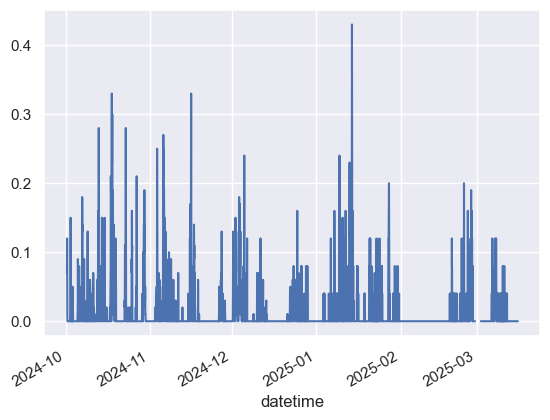

In [17]:
df_PPSA2['PPIRZZZ'].plot()

<Axes: xlabel='datetime'>

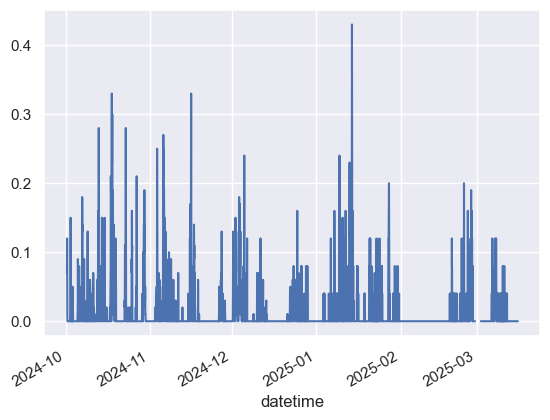

In [18]:
df_PPSA2['PPIRZZZ'].plot()

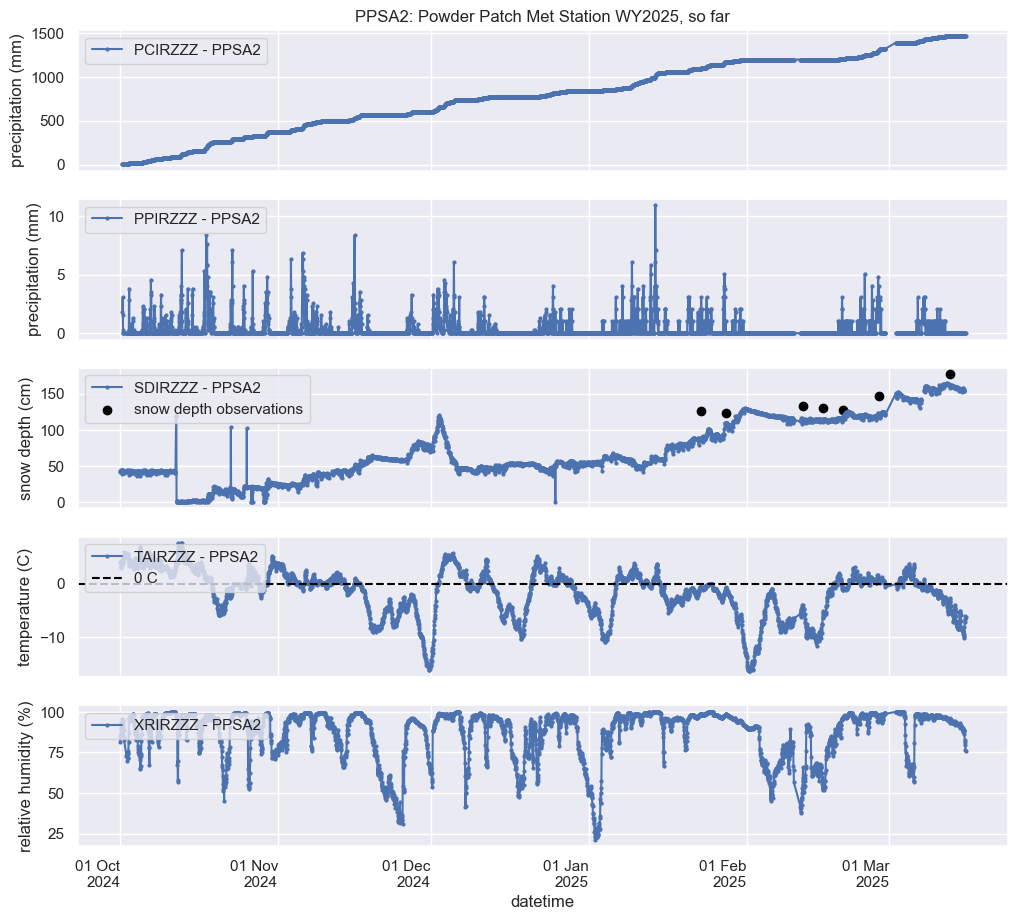

In [19]:
# now lets plot all the df_PPSA2 data, with each variable in subplots 
# Create a figure with subplots for each variable
# fig, ax = plt.subplots(len(df_PPSA2.columns), 1, figsize=(12, 20), sharex=True)
fig, ax = plt.subplots(5, 1, figsize=(12, 12), sharex=True)

ax[0].set_title('PPSA2: Powder Patch Met Station WY2025, so far')


(df_PPSA2['PCIRZZZ']*25.4).plot(ax=ax[0],marker='o', markersize=2, label='PCIRZZZ - PPSA2') # mm

(df_PPSA2['PPIRZZZ']*25.4).plot(ax=ax[1],marker='o', markersize=2, label='PPIRZZZ - PPSA2') # calculated, mm / hr


(df_PPSA2['SDIRZZZ']*2.54).plot(ax=ax[2],marker='o', markersize=2, label='SDIRZZZ - PPSA2') # in inches 
ax[2].scatter(df_obs.index, df_obs['snowdepth'], label='snow depth observations', color='black', marker='o') # add in the observations

((df_PPSA2['TAIRZZZ'] - 32)*5.0/9.0).plot(ax=ax[3],marker='o', markersize=2, label='TAIRZZZ - PPSA2') # now in C
# add a zero line on air temperature 
ax[3].axhline(y=0, color='black', linestyle='--', label='0 C')

df_PPSA2['XRIRZZZ'].plot(ax=ax[4],marker='o', markersize=2, label='XRIRZZZ - PPSA2')

ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('precipitation (mm)')
ax[2].set_ylabel('snow depth (cm)')
ax[3].set_ylabel('temperature (C)')
ax[4].set_ylabel('relative humidity (%)')
        
# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')
# Set x-axis major formatter
ax[-1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
plt.setp(ax[-1].xaxis.get_majorticklabels(), rotation=360)

# show a legend on all subplots
loc = 'upper left'
ax[0].legend(loc=loc)
ax[1].legend(loc=loc)
ax[2].legend(loc=loc)
ax[3].legend(loc=loc)
ax[4].legend(loc=loc)

plt.show()

Now, resample the entire dataset hourly and then plot again

In [20]:
df_PPSA2.head()

,station,utc_valid,PCIRZZZ,SDIRZZZ,TAIRZZZ,XRIRZZZ,PPIRZZZ
datetime,,,,,,,
2024-10-01 00:00:00,PPSA2,2024-10-01 00:00:00,NaN,16.97,39.2,81.6,NaN
2024-10-01 01:00:00,PPSA2,2024-10-01 01:00:00,NaN,16.58,39.3,85.1,NaN
2024-10-01 02:00:00,PPSA2,2024-10-01 02:00:00,NaN,16.88,39.3,86.2,NaN
2024-10-01 03:00:00,PPSA2,2024-10-01 03:00:00,NaN,16.18,38.3,90.0,NaN
2024-10-01 04:00:00,PPSA2,2024-10-01 04:00:00,NaN,17.19,37.5,92.3,NaN


In [21]:
# drop the station and utc_valid columns 
df_PPSA2 = df_PPSA2.drop(columns=['station', 'utc_valid'])
df_PPSA2.head()

,PCIRZZZ,SDIRZZZ,TAIRZZZ,XRIRZZZ,PPIRZZZ
datetime,,,,,
2024-10-01 00:00:00,NaN,16.97,39.2,81.6,NaN
2024-10-01 01:00:00,NaN,16.58,39.3,85.1,NaN
2024-10-01 02:00:00,NaN,16.88,39.3,86.2,NaN
2024-10-01 03:00:00,NaN,16.18,38.3,90.0,NaN
2024-10-01 04:00:00,NaN,17.19,37.5,92.3,NaN


In [22]:
df_PPSA2_hourly = df_PPSA2.resample('h').mean()
df_PPSA2_hourly

,PCIRZZZ,SDIRZZZ,TAIRZZZ,XRIRZZZ,PPIRZZZ
datetime,,,,,
2024-10-01 00:00:00,NaN,16.97,39.2,81.60,NaN
2024-10-01 01:00:00,NaN,16.58,39.3,85.10,NaN
2024-10-01 02:00:00,NaN,16.88,39.3,86.20,NaN
2024-10-01 03:00:00,NaN,16.18,38.3,90.00,NaN
2024-10-01 04:00:00,NaN,17.19,37.5,92.30,NaN
...,...,...,...,...,...
2025-03-15 20:00:00,57.52,NaN,19.0,81.30,0.0
2025-03-15 21:00:00,57.52,NaN,20.2,79.62,0.0
2025-03-15 22:00:00,57.52,NaN,20.2,82.40,0.0


In [23]:
# now, make a fully metric version of the dataset 
df_PPSA2_hourly_metric = df_PPSA2_hourly.copy()
df_PPSA2_hourly_metric['PCIRZZZ'] = df_PPSA2_hourly['PCIRZZZ']*25.4 # from in to mm
df_PPSA2_hourly_metric['PPIRZZZ'] = df_PPSA2_hourly['PPIRZZZ']*25.4 # from in to mm
df_PPSA2_hourly_metric['SDIRZZZ'] = df_PPSA2_hourly['SDIRZZZ']*2.54 # from in to cm 
df_PPSA2_hourly_metric['TAIRZZZ'] = (df_PPSA2_hourly['TAIRZZZ'] - 32)*5.0/9.0 # from F to C 

# XRIRZZZ is good in %

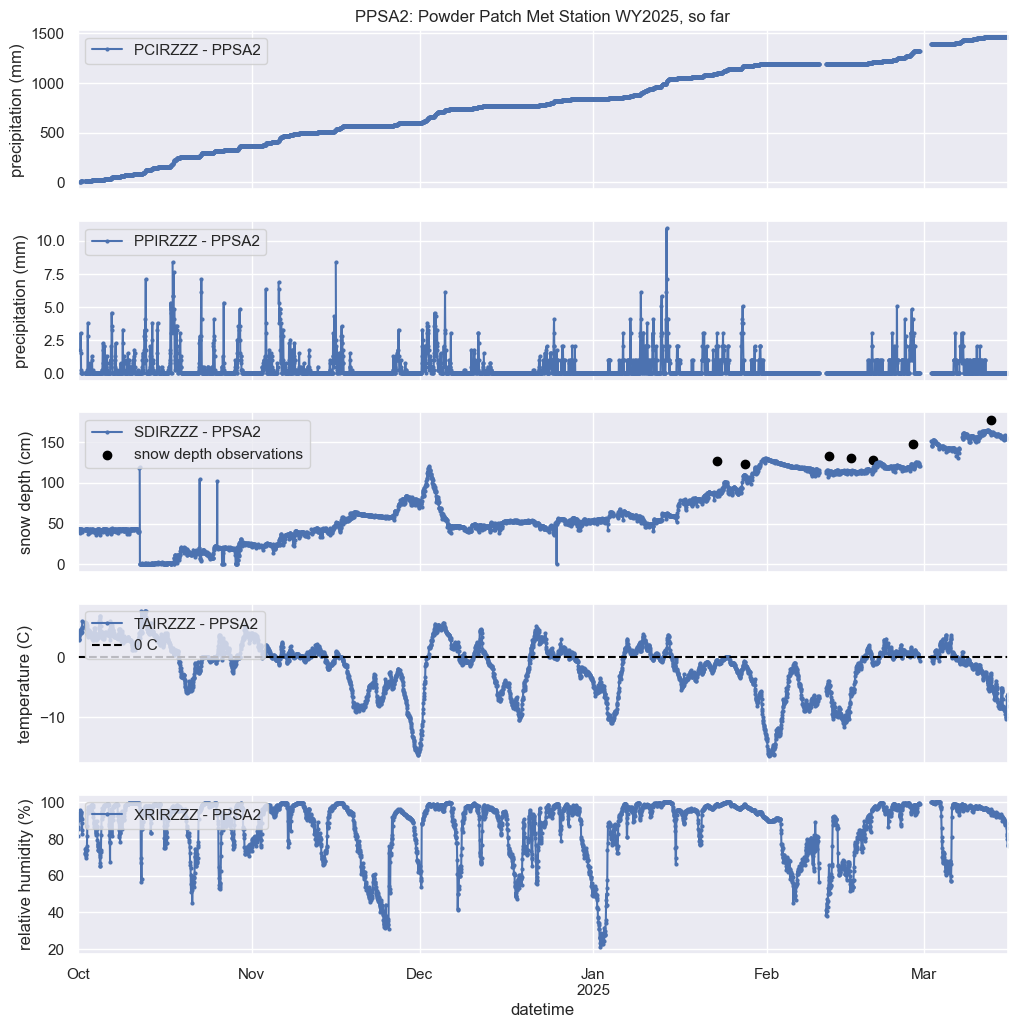

In [24]:
fig, ax = plt.subplots(5, 1, figsize=(12, 12), sharex=True)

ax[0].set_title('PPSA2: Powder Patch Met Station WY2025, so far')


df_PPSA2_hourly_metric['PCIRZZZ'].plot(ax=ax[0],marker='o', markersize=2, label='PCIRZZZ - PPSA2') # mm
df_PPSA2_hourly_metric['PPIRZZZ'].plot(ax=ax[1],marker='o', markersize=2, label='PPIRZZZ - PPSA2') # calculated, mm / hr

df_PPSA2_hourly_metric['SDIRZZZ'].plot(ax=ax[2],marker='o', markersize=2, label='SDIRZZZ - PPSA2') # in inches 
ax[2].scatter(df_obs.index, df_obs['snowdepth'], label='snow depth observations', color='black', marker='o') # add in the observations

df_PPSA2_hourly_metric['TAIRZZZ'].plot(ax=ax[3],marker='o', markersize=2, label='TAIRZZZ - PPSA2') # now in C
ax[3].axhline(y=0, color='black', linestyle='--', label='0 C')

df_PPSA2_hourly_metric['XRIRZZZ'].plot(ax=ax[4],marker='o', markersize=2, label='XRIRZZZ - PPSA2')

ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('precipitation (mm)')
ax[2].set_ylabel('snow depth (cm)')
ax[3].set_ylabel('temperature (C)')
ax[4].set_ylabel('relative humidity (%)')
        
# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')
# Set x-axis major formatter
# ax[-1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
# plt.setp(ax[-1].xaxis.get_majorticklabels(), rotation=360)

# show a legend on all subplots
loc = 'upper left'
ax[0].legend(loc=loc)
ax[1].legend(loc=loc)
ax[2].legend(loc=loc)
ax[3].legend(loc=loc)
ax[4].legend(loc=loc)

plt.show()

### Look at smoother and make a figure for DoD Report

In [25]:
import statsmodels.api as sm

In [29]:
df_PPSA2_hourly_metric

,PCIRZZZ,SDIRZZZ,TAIRZZZ,XRIRZZZ,PPIRZZZ
datetime,,,,,
2024-10-01 00:00:00,NaN,43.1038,4.000000,81.60,NaN
2024-10-01 01:00:00,NaN,42.1132,4.055556,85.10,NaN
2024-10-01 02:00:00,NaN,42.8752,4.055556,86.20,NaN
2024-10-01 03:00:00,NaN,41.0972,3.500000,90.00,NaN
2024-10-01 04:00:00,NaN,43.6626,3.055556,92.30,NaN
...,...,...,...,...,...
2025-03-15 20:00:00,1461.008,NaN,-7.222222,81.30,0.0
2025-03-15 21:00:00,1461.008,NaN,-6.555556,79.62,0.0
2025-03-15 22:00:00,1461.008,NaN,-6.555556,82.40,0.0


Creating a smoothed dataframe...

In [34]:
# frac = 0.1 
# df_PPSA2_hourly_metric_smoothed = sm.nonparametric.lowess(df_PPSA2_hourly_metric, frac=frac, return_sorted=False)
# df_PPSA2_hourly_metric_smoothed

# Set smoothing parameter
frac = 0.01  # Adjust this for more/less smoothing

# Reset index to access 'datetime' as a column
df_smoothed = df_PPSA2_hourly_metric.reset_index()

# Apply LOWESS smoothing to all numeric columns
for col in ["PCIRZZZ", "SDIRZZZ", "TAIRZZZ", "XRIRZZZ", "PPIRZZZ"]:
    df_smoothed[col] = sm.nonparametric.lowess(
        df_smoothed[col], df_smoothed["datetime"], frac=frac, return_sorted=False
    )

# Restore datetime as index
df_smoothed.set_index("datetime", inplace=True)

Variable `frac` values for each variable...

In [37]:
# # Define smoothing parameters for each variable
# frac_values = {
#     "TAIRZZZ": 0.1,   # Air temperature
#     "SDIRZZZ": 0.2,   # Snow depth
#     "XRIRZZZ": 0.15,  # Relative humidity
#     "PPIRZZZ": 0.05,  # Precipitation rate
#     "PCIRZZZ": 0.2    # Accumulated precipitation
# }

# # Reset index to access 'datetime' as a column
# df_smoothed = df_PPSA2_hourly_metric.reset_index()

# # Apply LOWESS smoothing to each variable using its specific frac value
# for col, frac in frac_values.items():
#     df_smoothed[col] = sm.nonparametric.lowess(
#         df_smoothed[col], df_smoothed["datetime"], frac=frac, return_sorted=False
#     )

# # Restore datetime as index
# df_smoothed.set_index("datetime", inplace=True)

Plot the smoothed data with the uncleaned data

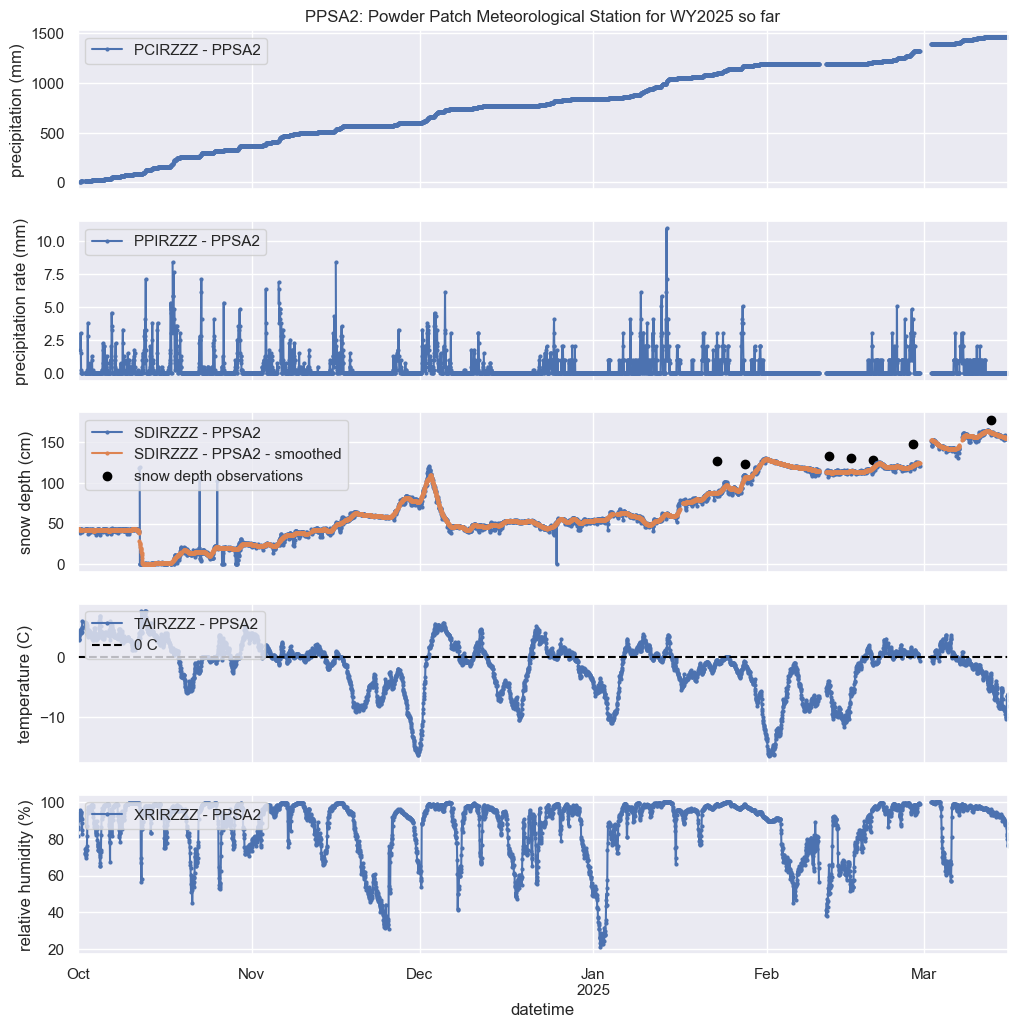

In [36]:
fig, ax = plt.subplots(5, 1, figsize=(12, 12), sharex=True)

ax[0].set_title('PPSA2: Powder Patch Meteorological Station for WY2025 so far')

# not smoothed data 
df_PPSA2_hourly_metric['PCIRZZZ'].plot(ax=ax[0],marker='o', markersize=2, label='PCIRZZZ - PPSA2') # mm
df_PPSA2_hourly_metric['PPIRZZZ'].plot(ax=ax[1],marker='o', markersize=2, label='PPIRZZZ - PPSA2') # calculated, mm / hr
df_PPSA2_hourly_metric['SDIRZZZ'].plot(ax=ax[2],marker='o', markersize=2, label='SDIRZZZ - PPSA2') # in inches 
df_PPSA2_hourly_metric['TAIRZZZ'].plot(ax=ax[3],marker='o', markersize=2, label='TAIRZZZ - PPSA2') # now in C
df_PPSA2_hourly_metric['XRIRZZZ'].plot(ax=ax[4],marker='o', markersize=2, label='XRIRZZZ - PPSA2')

# smoothed data 
# df_smoothed['PCIRZZZ'].plot(ax=ax[0],marker='o', markersize=2, label='PCIRZZZ - PPSA2 - smoothed') # mm
# df_smoothed['PPIRZZZ'].plot(ax=ax[1],marker='o', markersize=2, label='PPIRZZZ - PPSA2 - smoothed') # calculated, mm / hr

df_smoothed['SDIRZZZ'].plot(ax=ax[2],marker='o', markersize=2, label='SDIRZZZ - PPSA2 - smoothed') # in inches 
ax[2].scatter(df_obs.index, df_obs['snowdepth'], label='snow depth observations', color='black', marker='o') # add in the observations

# df_smoothed['TAIRZZZ'].plot(ax=ax[3],marker='o', markersize=2, label='TAIRZZZ - PPSA2 - smoothed') # now in C
ax[3].axhline(y=0, color='black', linestyle='--', label='0 C')

# df_smoothed['XRIRZZZ'].plot(ax=ax[4],marker='o', markersize=2, label='XRIRZZZ - PPSA2 - smoothed')

# labels 
ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('precipitation rate (mm)')
ax[2].set_ylabel('snow depth (cm)')
ax[3].set_ylabel('temperature (C)')
ax[4].set_ylabel('relative humidity (%)')
        
# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')
# Set x-axis major formatter
# ax[-1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
# plt.setp(ax[-1].xaxis.get_majorticklabels(), rotation=360)

# show a legend on all subplots
loc = 'upper left'
ax[0].legend(loc=loc)
ax[1].legend(loc=loc)
ax[2].legend(loc=loc)
ax[3].legend(loc=loc)
ax[4].legend(loc=loc)

plt.show()

### Now, looking into forcing data specifically...

Now, only plot the Snow-17 Model Forcing Data 

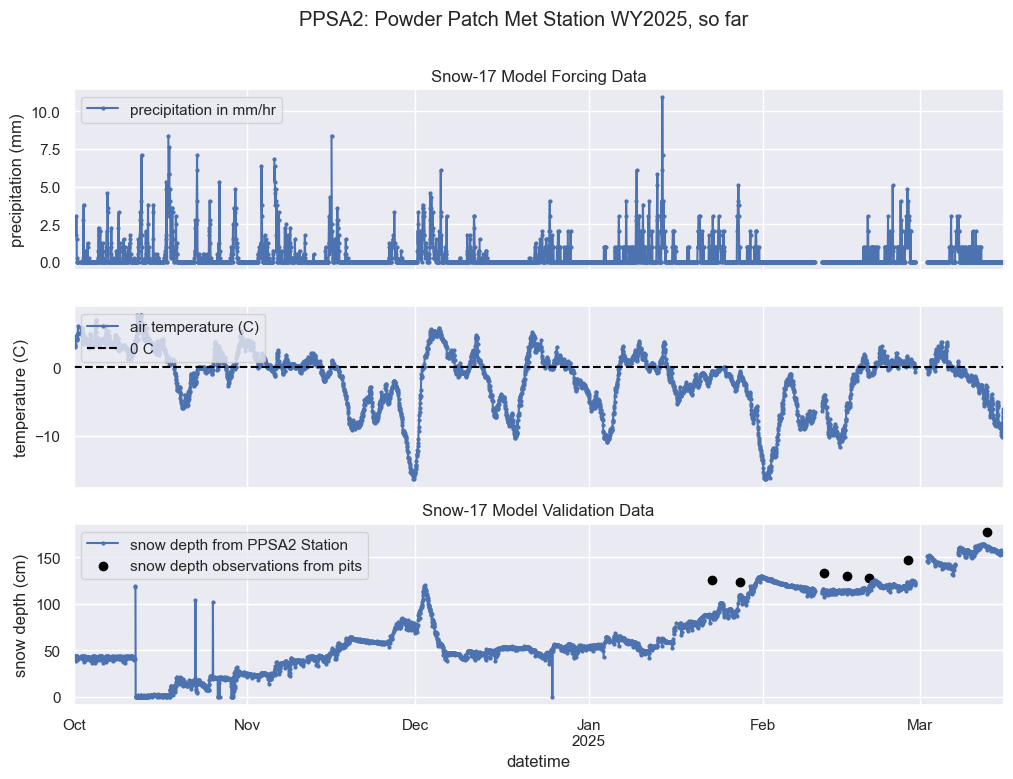

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

plt.suptitle('PPSA2: Powder Patch Met Station WY2025, so far')
ax[0].set_title('Snow-17 Model Forcing Data')
df_PPSA2_hourly_metric['PPIRZZZ'].plot(ax=ax[0],marker='o', markersize=2, label='precipitation in mm/hr') # calculated, mm / hr
df_PPSA2_hourly_metric['TAIRZZZ'].plot(ax=ax[1],marker='o', markersize=2, label='air temperature (C)') # now in C
ax[1].axhline(y=0, color='black', linestyle='--', label='0 C')
df_PPSA2_hourly_metric['SDIRZZZ'].plot(ax=ax[2],marker='o', markersize=2, label='snow depth from PPSA2 Station') # in inches 
ax[2].set_title('Snow-17 Model Validation Data')
ax[2].scatter(df_obs.index, df_obs['snowdepth'], label='snow depth observations from pits', color='black', marker='o') # add in the observations

ax[0].set_ylabel('precipitation (mm)')
ax[1].set_ylabel('temperature (C)')
ax[2].set_ylabel('snow depth (cm)')
        
# Set common x-label for all subplots
ax[-1].set_xlabel('datetime')
# Set x-axis major formatter
# ax[-1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
# plt.setp(ax[-1].xaxis.get_majorticklabels(), rotation=360)

# show a legend on all subplots
loc = 'upper left'
ax[0].legend(loc=loc)
ax[1].legend(loc=loc)
ax[2].legend(loc=loc)

plt.show()

## Make a simple snow-17 forcing data file, with temperature and precipitation

<Axes: xlabel='datetime'>

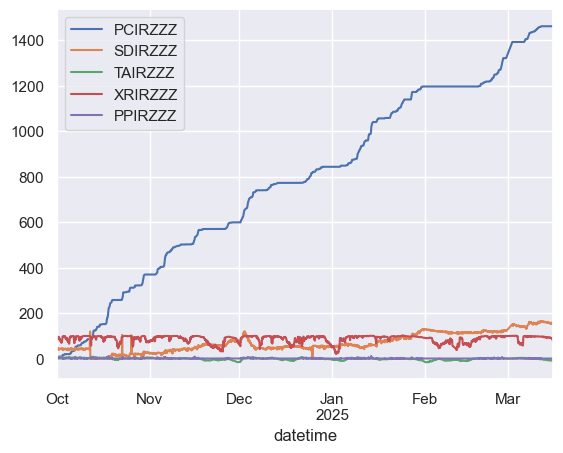

In [138]:
# first, let's fill nan with interpolation 
df_PPSA2_hourly_metric_fill = df_PPSA2_hourly_metric.interpolate(method='linear', limit_direction='both')
df_PPSA2_hourly_metric_fill.plot()

In [139]:
PPSA2_WY2025_Forcing_Test = df_PPSA2_hourly_metric_fill.copy()
PPSA2_WY2025_Forcing_Test.head()

,PCIRZZZ,SDIRZZZ,TAIRZZZ,XRIRZZZ,PPIRZZZ
datetime,,,,,
2024-10-01 00:00:00,1.778,43.1038,4.000000,81.6,1.778
2024-10-01 01:00:00,1.778,42.1132,4.055556,85.1,1.778
2024-10-01 02:00:00,1.778,42.8752,4.055556,86.2,1.778
2024-10-01 03:00:00,1.778,41.0972,3.500000,90.0,1.778
2024-10-01 04:00:00,1.778,43.6626,3.055556,92.3,1.778


In [140]:
# drop the variables we do not need 
PPSA2_WY2025_Forcing_Test = PPSA2_WY2025_Forcing_Test.drop(columns=['PCIRZZZ'])
PPSA2_WY2025_Forcing_Test = PPSA2_WY2025_Forcing_Test.drop(columns=['SDIRZZZ'])
PPSA2_WY2025_Forcing_Test = PPSA2_WY2025_Forcing_Test.drop(columns=['XRIRZZZ'])

PPSA2_WY2025_Forcing_Test

,TAIRZZZ,PPIRZZZ
datetime,,
2024-10-01 00:00:00,4.000000,1.778
2024-10-01 01:00:00,4.055556,1.778
2024-10-01 02:00:00,4.055556,1.778
2024-10-01 03:00:00,3.500000,1.778
2024-10-01 04:00:00,3.055556,1.778
...,...,...
2025-03-15 20:00:00,-7.222222,0.000
2025-03-15 21:00:00,-6.555556,0.000
2025-03-15 22:00:00,-6.555556,0.000


In [141]:
# break up the datetime index into year, month, day, hour
PPSA2_WY2025_Forcing_Test['year'] = PPSA2_WY2025_Forcing_Test.index.year
PPSA2_WY2025_Forcing_Test['mo'] = PPSA2_WY2025_Forcing_Test.index.month
PPSA2_WY2025_Forcing_Test['dy'] = PPSA2_WY2025_Forcing_Test.index.day
PPSA2_WY2025_Forcing_Test['hr'] = PPSA2_WY2025_Forcing_Test.index.hour
# PPSA2_WY2025_Forcing_Test['minute'] = PPSA2_WY2025_Forcing_Test.index.minute
# PPSA2_WY2025_Forcing_Test['second'] = PPSA2_WY2025_Forcing_Test.index.second
PPSA2_WY2025_Forcing_Test.head()

,TAIRZZZ,PPIRZZZ,year,mo,dy,hr
datetime,,,,,,
2024-10-01 00:00:00,4.000000,1.778,2024,10,1,0
2024-10-01 01:00:00,4.055556,1.778,2024,10,1,1
2024-10-01 02:00:00,4.055556,1.778,2024,10,1,2
2024-10-01 03:00:00,3.500000,1.778,2024,10,1,3
2024-10-01 04:00:00,3.055556,1.778,2024,10,1,4


### Open the SNOW-17 Test Case Forcing File 
to see the structure, units, etc.

In [142]:
import os

In [143]:
# filepath_output = '/home/cassie/programs/snow17/test_cases/ex1/output/'
# filename_output = 'output.snow17bmi.HHWM8IL.txt'

filepath_input = '/home/cassie/programs/snow17/test_cases/ex1/input/forcing/'
filename_input = 'forcing.snow17bmi.HHWM8IL.csv'

fullpath = os.path.join(filepath_input, filename_input)

df_ex = pd.read_csv(fullpath) # use delimiter = '\t' or ',' if comma-separated 
df_ex

,year,mo,dy,hr,prec_mm_s-1,tavg_degc
0,1970,1,1,12,4.861110e-06,-9.35
1,1970,1,2,12,4.166670e-06,-9.23
2,1970,1,3,12,9.143520e-06,-11.84
3,1970,1,4,12,8.796300e-06,-13.45
4,1970,1,5,12,7.523150e-06,-18.82
...,...,...,...,...,...,...
16796,2015,12,27,12,9.722220e-06,-6.34
16797,2015,12,28,12,5.324070e-06,-7.21
16798,2015,12,29,12,2.847220e-05,-9.97
16799,2015,12,30,12,2.083330e-06,-10.79


<Axes: >

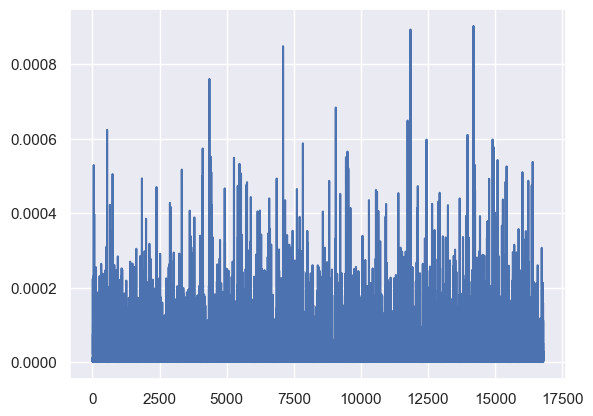

In [144]:
df_ex['prec_mm_s-1'].plot()

In [145]:
# Rename the columns to be year, month, day, hour 
df_ex = df_ex.rename(columns={'year': 'year', 'mo': 'month', 'dy': 'day', 'hr': 'hour'})
df_ex

,year,month,day,hour,prec_mm_s-1,tavg_degc
0,1970,1,1,12,4.861110e-06,-9.35
1,1970,1,2,12,4.166670e-06,-9.23
2,1970,1,3,12,9.143520e-06,-11.84
3,1970,1,4,12,8.796300e-06,-13.45
4,1970,1,5,12,7.523150e-06,-18.82
...,...,...,...,...,...,...
16796,2015,12,27,12,9.722220e-06,-6.34
16797,2015,12,28,12,5.324070e-06,-7.21
16798,2015,12,29,12,2.847220e-05,-9.97
16799,2015,12,30,12,2.083330e-06,-10.79


In [146]:
# Define the start and end dates
start_date = datetime(1970, 1, 1)
end_date = datetime(2015, 12, 31)

# Calculate the difference in days
days_difference = (end_date - start_date).days
print(days_difference)

16800


So the forcing dataset is one observation per day... but then how is the precipitation in mm / s?

In [147]:
# make a datetime variable from the year, month, day, hour columns 
df_ex['datetime'] = pd.to_datetime(df_ex[['year', 'month', 'day', 'hour']])
df_ex = df_ex.set_index('datetime')
df_ex

,year,month,day,hour,prec_mm_s-1,tavg_degc
datetime,,,,,,
1970-01-01 12:00:00,1970,1,1,12,4.861110e-06,-9.35
1970-01-02 12:00:00,1970,1,2,12,4.166670e-06,-9.23
1970-01-03 12:00:00,1970,1,3,12,9.143520e-06,-11.84
1970-01-04 12:00:00,1970,1,4,12,8.796300e-06,-13.45
1970-01-05 12:00:00,1970,1,5,12,7.523150e-06,-18.82
...,...,...,...,...,...,...
2015-12-27 12:00:00,2015,12,27,12,9.722220e-06,-6.34
2015-12-28 12:00:00,2015,12,28,12,5.324070e-06,-7.21
2015-12-29 12:00:00,2015,12,29,12,2.847220e-05,-9.97


### So my guess is: the input data is an average precipitation INTENSITY (so mm/s) during the time step, so since the time step is 24h, the daily precipitation SUM (so in mm) is intensity * 24 * 3600

In [148]:
PPSA2_WY2025_Forcing_Test.head()

,TAIRZZZ,PPIRZZZ,year,mo,dy,hr
datetime,,,,,,
2024-10-01 00:00:00,4.000000,1.778,2024,10,1,0
2024-10-01 01:00:00,4.055556,1.778,2024,10,1,1
2024-10-01 02:00:00,4.055556,1.778,2024,10,1,2
2024-10-01 03:00:00,3.500000,1.778,2024,10,1,3
2024-10-01 04:00:00,3.055556,1.778,2024,10,1,4


precipitation needs to be the daily sum, then divided by (24*3600)

In [149]:
PPSA2_WY2025_Forcing_Test_daily_sum = PPSA2_WY2025_Forcing_Test.resample('D').sum()
PPSA2_WY2025_Forcing_Test_daily_sum['precip_intensity'] = PPSA2_WY2025_Forcing_Test_daily_sum['PPIRZZZ']/ (3600*24) # convert mm/hr to mm/s
PPSA2_WY2025_Forcing_Test_daily_sum.head() # precip needs to be sum

,TAIRZZZ,PPIRZZZ,year,mo,dy,hr,precip_intensity
datetime,,,,,,,
2024-10-01,105.570707,26.162,48576,240,24,276,0.000303
2024-10-02,121.818182,7.112,48576,240,48,276,0.000082
2024-10-03,88.222222,4.064,48576,240,72,276,0.000047
2024-10-04,97.500000,0.000,48576,240,96,276,0.000000
2024-10-05,93.222222,11.938,48576,240,120,276,0.000138


In [150]:
PPSA2_WY2025_Forcing_Test_daily_mean = PPSA2_WY2025_Forcing_Test.resample('D').mean()
PPSA2_WY2025_Forcing_Test_daily_mean['temp_avg'] = PPSA2_WY2025_Forcing_Test_daily_mean['TAIRZZZ'].copy()
PPSA2_WY2025_Forcing_Test_daily_mean.head() # air temperature needs to be mean

,TAIRZZZ,PPIRZZZ,year,mo,dy,hr,temp_avg
datetime,,,,,,,
2024-10-01,4.398779,1.090083,2024.0,10.0,1.0,11.5,4.398779
2024-10-02,5.075758,0.296333,2024.0,10.0,2.0,11.5,5.075758
2024-10-03,3.675926,0.169333,2024.0,10.0,3.0,11.5,3.675926
2024-10-04,4.062500,0.000000,2024.0,10.0,4.0,11.5,4.062500
2024-10-05,3.884259,0.497417,2024.0,10.0,5.0,11.5,3.884259


In [157]:
# now add the precip intensity to the daily mean dataframe
PPSA2_WY2025_Forcing_Test_daily_mean['precip_intensity'] = PPSA2_WY2025_Forcing_Test_daily_sum['precip_intensity']

# set the hour to 12 for the daily mean
PPSA2_WY2025_Forcing_Test_daily_mean['hr'] = 12
# reorder the columns to be year, month, day, hour
PPSA2_WY2025_Forcing_Test_daily_mean = PPSA2_WY2025_Forcing_Test_daily_mean[['year', 'mo', 'dy', 'hr', 'precip_intensity', 'temp_avg']]
PPSA2_WY2025_Forcing_Test_daily_mean.head()

,year,mo,dy,hr,precip_intensity,temp_avg
datetime,,,,,,
2024-10-01,2024.0,10.0,1.0,12,0.000303,4.398779
2024-10-02,2024.0,10.0,2.0,12,0.000082,5.075758
2024-10-03,2024.0,10.0,3.0,12,0.000047,3.675926
2024-10-04,2024.0,10.0,4.0,12,0.000000,4.062500
2024-10-05,2024.0,10.0,5.0,12,0.000138,3.884259


In [158]:
# fix the year mon day hr to only be integers 
PPSA2_WY2025_Forcing_Test_daily_mean['year'] = PPSA2_WY2025_Forcing_Test_daily_mean['year'].astype(int)
PPSA2_WY2025_Forcing_Test_daily_mean['mo'] = PPSA2_WY2025_Forcing_Test_daily_mean['mo'].astype(int)
PPSA2_WY2025_Forcing_Test_daily_mean['dy'] = PPSA2_WY2025_Forcing_Test_daily_mean['dy'].astype(int)
PPSA2_WY2025_Forcing_Test_daily_mean['hr'] = PPSA2_WY2025_Forcing_Test_daily_mean['hr'].astype(int)
PPSA2_WY2025_Forcing_Test_daily_mean.head()

,year,mo,dy,hr,precip_intensity,temp_avg
datetime,,,,,,
2024-10-01,2024,10,1,12,0.000303,4.398779
2024-10-02,2024,10,2,12,0.000082,5.075758
2024-10-03,2024,10,3,12,0.000047,3.675926
2024-10-04,2024,10,4,12,0.000000,4.062500
2024-10-05,2024,10,5,12,0.000138,3.884259


In [159]:
# # first, convert PPIRZZZ from mm/hour to mm/s by dividing by 3600
# PPSA2_WY2025_Forcing_Test['prec_mm_s-1'] = PPSA2_WY2025_Forcing_Test['PPIRZZZ'].div(3600 * 24)

Now, we create the forcing data file 

In [160]:
PPSA2_WY2025_Forcing_Test_2 = PPSA2_WY2025_Forcing_Test_daily_mean.copy()

# rename precip intensity to precip_mm_s-1
PPSA2_WY2025_Forcing_Test_2 = PPSA2_WY2025_Forcing_Test_2.rename(columns={'precip_intensity': 'prec_mm_s-1'})
PPSA2_WY2025_Forcing_Test_2 = PPSA2_WY2025_Forcing_Test_2.rename(columns={'temp_avg': 'tavg_decc'})

# and reset the index 
PPSA2_WY2025_Forcing_Test_2 = PPSA2_WY2025_Forcing_Test_2.reset_index()

# and drop the datetime column 
PPSA2_WY2025_Forcing_Test_2 = PPSA2_WY2025_Forcing_Test_2.drop(columns=['datetime'])

PPSA2_WY2025_Forcing_Test_2.head()

,year,mo,dy,hr,prec_mm_s-1,tavg_decc
0,2024,10,1,12,0.000303,4.398779
1,2024,10,2,12,0.000082,5.075758
2,2024,10,3,12,0.000047,3.675926
3,2024,10,4,12,0.000000,4.062500
4,2024,10,5,12,0.000138,3.884259


In [161]:
# now write PPSA2_WY2025_Forcing_Test_2 to a csv file 
PPSA2_WY2025_Forcing_Test_2.to_csv('/home/cassie/data/fishcreek/mesonet/testdata/PPSA2_WY2025_Forcing_Test_2.csv', index=False)

Below was the code to create an hourly forcing data file... 

In [ ]:
# # now get a new column with the correct forcing file name 
# # PPSA2_WY2025_Forcing_Test['prec_mm_s-1'] = PPSA2_WY2025_Forcing_Test['PPIRZZZ'].copy()
# PPSA2_WY2025_Forcing_Test['prec_mm_s-1'] = PPSA2_WY2025_Forcing_Test['PPIRZZZ'].copy() # since we have mm per hour, not per second 

# # now drop the original PPIRZZZ column
# PPSA2_WY2025_Forcing_Test = PPSA2_WY2025_Forcing_Test.drop(columns=['PPIRZZZ'])

# # now get a new column with the correct forcing file name 
# PPSA2_WY2025_Forcing_Test['tavg_decc'] = PPSA2_WY2025_Forcing_Test['TAIRZZZ'].copy()

# # now drop the original TAIRZZZ column
# PPSA2_WY2025_Forcing_Test = PPSA2_WY2025_Forcing_Test.drop(columns=['TAIRZZZ'])

# # and reset the index 
# PPSA2_WY2025_Forcing_Test = PPSA2_WY2025_Forcing_Test.reset_index()

# # and drop the datetime column 
# PPSA2_WY2025_Forcing_Test = PPSA2_WY2025_Forcing_Test.drop(columns=['datetime'])

# PPSA2_WY2025_Forcing_Test.head()

# # now write PPSA2_WY2025_Forcing_Test to a csv file 
# PPSA2_WY2025_Forcing_Test.to_csv('/home/cassie/data/fishcreek/mesonet/testdata/PPSA2_WY2025_Forcing_Test.csv', index=False)

,year,mo,dy,hr,prec_mm_h-1,tavg_decc
0,2024,10,1,0,1.778,4.000000
1,2024,10,1,1,1.778,4.055556
2,2024,10,1,2,1.778,4.055556
3,2024,10,1,3,1.778,3.500000
4,2024,10,1,4,1.778,3.055556


<Axes: >

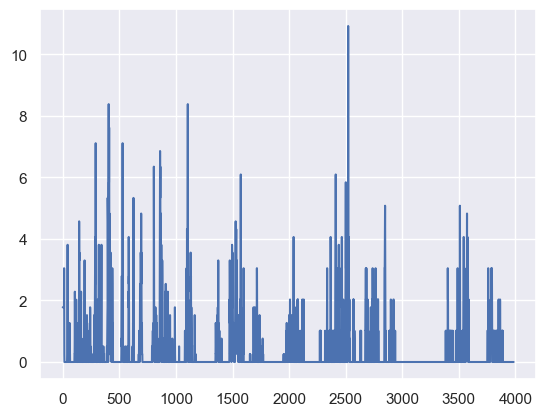

In [71]:
PPSA2_WY2025_Forcing_Test['prec_mm_h-1'].plot()

###  I have no idea how,  but I ran Snow-17 so let's check out the output 

In [162]:
filepath = '/home/cassie/programs/snow17/test_cases/test1/output/'
# filepath = '/home/cassie/programs/snow17/test_cases/test1/output/archive/'
filename = 'output.snow17bmi.PPSA2.txt'
fullpath = os.path.join(filepath, filename)

df_output  = pd.read_csv(fullpath, sep=r'\s+', header=0) # using delim_whitespaced worked for the header, but it made a warning so the following is a work around)

# df_output = pd.read_csv(fullpath, sep='\t', skiprows=1, header=None, names=['datetime', 'value'])
df_output
# df_output['datetime'] = pd.to_datetime(df_output['datetime'])
# df_output = df_output.set_index('datetime')
# df_output.head()

,year,mo,dy,hr,tair,precip,precip*scf,sneqv,snowh,raim
0,2024,10,1,12,4.399,26.162,56.295,0.000,0.000,26.162
1,2024,10,2,12,5.076,7.112,15.303,0.000,0.000,7.112
2,2024,10,3,12,3.676,4.064,8.745,0.000,0.000,4.064
3,2024,10,4,12,4.062,0.000,0.000,0.000,0.000,0.000
4,2024,10,5,12,3.884,11.938,25.688,0.000,0.000,11.938
...,...,...,...,...,...,...,...,...,...,...
162,2025,3,12,12,-3.870,1.016,2.186,1692.087,4.708,0.308
163,2025,3,13,12,-5.391,0.000,0.000,1691.779,4.662,0.308
164,2025,3,14,12,-7.215,0.000,0.000,1691.471,4.619,0.308
165,2025,3,15,12,-8.222,0.000,0.000,1691.163,4.581,0.308


In [164]:
# first rename mo, dy, hr to month, day, hour
df_output = df_output.rename(columns={'mo': 'month', 'dy': 'day', 'hr': 'hour'})
df_output

,year,month,day,hour,tair,precip,precip*scf,sneqv,snowh,raim
0,2024,10,1,12,4.399,26.162,56.295,0.000,0.000,26.162
1,2024,10,2,12,5.076,7.112,15.303,0.000,0.000,7.112
2,2024,10,3,12,3.676,4.064,8.745,0.000,0.000,4.064
3,2024,10,4,12,4.062,0.000,0.000,0.000,0.000,0.000
4,2024,10,5,12,3.884,11.938,25.688,0.000,0.000,11.938
...,...,...,...,...,...,...,...,...,...,...
162,2025,3,12,12,-3.870,1.016,2.186,1692.087,4.708,0.308
163,2025,3,13,12,-5.391,0.000,0.000,1691.779,4.662,0.308
164,2025,3,14,12,-7.215,0.000,0.000,1691.471,4.619,0.308
165,2025,3,15,12,-8.222,0.000,0.000,1691.163,4.581,0.308


In [165]:
# take the year, mo, dr, hr columns to make a datetime column 
df_output['datetime'] = pd.to_datetime(df_output[['year', 'month', 'day', 'hour']])
df_output = df_output.set_index('datetime')
df_output.head()

,year,month,day,hour,tair,precip,precip*scf,sneqv,snowh,raim
datetime,,,,,,,,,,
2024-10-01 12:00:00,2024,10,1,12,4.399,26.162,56.295,0.0,0.0,26.162
2024-10-02 12:00:00,2024,10,2,12,5.076,7.112,15.303,0.0,0.0,7.112
2024-10-03 12:00:00,2024,10,3,12,3.676,4.064,8.745,0.0,0.0,4.064
2024-10-04 12:00:00,2024,10,4,12,4.062,0.000,0.000,0.0,0.0,0.000
2024-10-05 12:00:00,2024,10,5,12,3.884,11.938,25.688,0.0,0.0,11.938


<Axes: xlabel='datetime'>

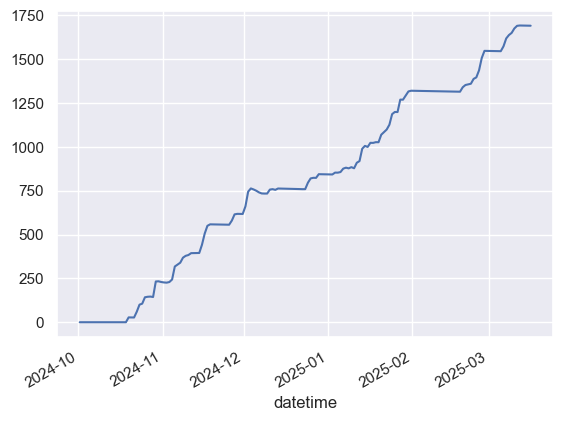

In [191]:
df_output['sneqv'].plot()

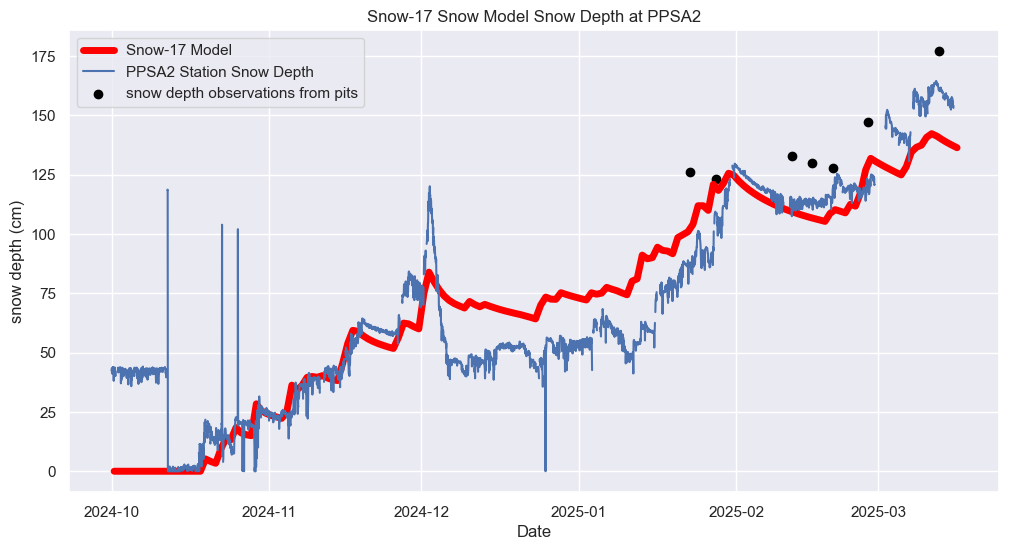

In [189]:
# now, plot the snowh with datetime 
plt.figure(figsize=(12,6))
plt.plot(df_output['snowh']*30, color='red', linewidth = 5, label = 'Snow-17 Model')
plt.xlabel('Date')
plt.ylabel('snow depth (cm)')
plt.title('Snow-17 Snow Model Snow Depth at PPSA2')

plt.plot(df_PPSA2_hourly_metric['SDIRZZZ'], label='PPSA2 Station Snow Depth')
plt.scatter(df_obs.index, df_obs['snowdepth'], label='snow depth observations from pits', color='black', marker='o') # add in the observations

# plt.xlim([pd.Timestamp('2012-10-01'), pd.Timestamp('2015-09-30')])
# plt.xlim([pd.Timestamp('2012-10-01 12:00:00'), pd.Timestamp('2014-09-30 12:00:00')])
plt.legend()
plt.show()

In [ ]:
# fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# plt.suptitle('PPSA2: Powder Patch Met Station WY2025, so far')
# ax[0].set_title('Snow-17 Model Forcing Data')
# df_PPSA2_hourly_metric['PPIRZZZ'].plot(ax=ax[0],marker='o', markersize=2, label='precipitation in mm/hr') # calculated, mm / hr
# df_PPSA2_hourly_metric['TAIRZZZ'].plot(ax=ax[1],marker='o', markersize=2, label='air temperature (C)') # now in C
# ax[1].axhline(y=0, color='black', linestyle='--', label='0 C')
# df_PPSA2_hourly_metric['SDIRZZZ'].plot(ax=ax[2],marker='o', markersize=2, label='snow depth from PPSA2 Station') # in inches 
# ax[2].set_title('Snow-17 Model Validation Data')
# ax[2].scatter(df_obs.index, df_obs['snowdepth'], label='snow depth observations from pits', color='black', marker='o') # add in the observations

# ax[0].set_ylabel('precipitation (mm)')
# ax[1].set_ylabel('temperature (C)')
# ax[2].set_ylabel('snow depth (cm)')
        
# # Set common x-label for all subplots
# ax[-1].set_xlabel('datetime')
# # Set x-axis major formatter
# # ax[-1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y')) #'%d %b\n%Y'
# # plt.setp(ax[-1].xaxis.get_majorticklabels(), rotation=360)

# # show a legend on all subplots
# loc = 'upper left'
# ax[0].legend(loc=loc)
# ax[1].legend(loc=loc)
# ax[2].legend(loc=loc)

# plt.show()